# Using Natural Language Processing on News articles to find the sentiment of the news realted to Gold

**Data 602 : Intro to Data Analysis and Machine Learning**

**Professor:** Dr. Antonio Diana

**Team:**


*   Hariom Vyas
*   Krutal Patel
*   Viral Jani
*   Durga Siva Sai Verma Rudraraju

Here we are using multipple techniques to find news related to gold on internet. We are using packages like NewsCatcher to go through websites like Guardian and finding if they have any top news related to gold on them to stay updated on latest trend. 

We are using Google news to find recent top news on gold.

After that we are using BeautifulSoup and request to go through diffrent articles and doing sentiment analysis on them. We are doing sentiment analysis using multiple ways. 


*   Textblob
*   Pattern

We are generating word cloud for all the news for visualizing unstructured text data and getting insights on trends and patterns.

## Installing required packages and dependancies

In [ ]:
!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install newscatcher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imprting required libraries

import requests
import nltk
from bs4 import BeautifulSoup
import urllib.request,sys,time
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
from textblob import TextBlob
from pattern.en import sentiment

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## News from NewsCatcher

In [ ]:
from newscatcher import Newscatcher, describe_url

newcatcher_news = []

mm = Newscatcher(website = 'https://www.theguardian.com/us')

for index, headline in enumerate(mm.get_headlines()):
   newcatcher_news.append(headline)
  
print(newcatcher_news)

['Twitter moderators turn to automation amid a reported surge in hate speech', 'FTX chief Sam Bankman-Fried says he ‘screwed up’ but rejects fraud claim', 'Musk says brain chip to begin human trials soon – and plans to get one himself', 'Password app LastPass hit by cybersecurity breach but says data remains safe', 'NBN losses to reach $25bn by 2040, report finds', 'FTX billionaire Sam Bankman-Fried funneled dark money to Republicans', 'Macron says he had ‘clear and honest’ discussion with Musk on Twitter policy', '#ClimateScam: denialism claims flooding Twitter have scientists worried', 'Elon Musk’s satellites to be part of UK trial to get internet to remote areas', 'EU raises prospect of big fine or ban if Twitter fails to follow new legislation', 'Pegasus spyware inquiry targeted by disinformation campaign, say experts', 'Amazon has delivered £3,500-worth of the same cookbook', 'Mobiles are ‘potential goldmines’ for hostile states, MPs warned', 'Australian companies don’t value keep

In [ ]:
cloud_words = ""

for val in newcatcher_news:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
  cloud_words += " ".join(tokens)+" "

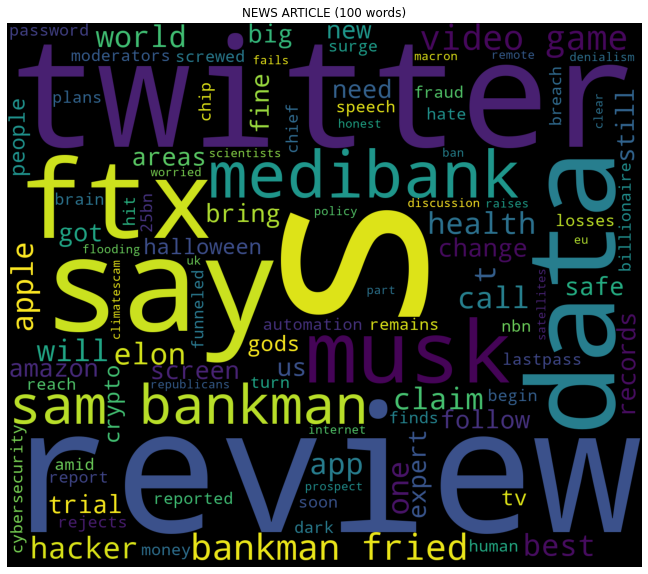

In [ ]:
# Plotting Word Cloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(cloud_words)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

## News from Google News

In [ ]:
from pygooglenews import GoogleNews

google_news = []

gn = GoogleNews()
s = gn.search('gold')

for entry in s["entries"]:
    google_news.append(entry["title"])

print(google_news)

['Gold retreats from near 4-month peak on positive U.S. jobs data - CNBC', 'Sentiment shows gold price has the momentum to move solidly above $1800 - Kitco NEWS', 'Gold and silver off to the races, or is this another false start - Kitco NEWS', 'Gold price powers to 3.5-mo. High, more upside likely - Kitco NEWS', '3 of the best times to invest in gold - CBS News', 'London gold body creates database of Russian bullion bars - Reuters', 'Gold flat as dollar rises - CNBC', 'Gold has a path to $2000 and silver to $25 in the second half of 2023 - Bank of America - Kitco NEWS', 'A new way of trading and spending gold is catching on in the Mountain West - Wyoming Public Media', 'Gold Chains Look Sexy on All Genders, All Body Types - The New York Times', "Technical outlook: Gold price may cross ₹54,000 mark in Dec. Here's why | Mint - Mint", 'Falling head grades put pressure on gold mining industry - report - Kitco NEWS', 'Gold/Silver: Christmas came early | Kitco News - Kitco NEWS', 'Gold Price

In [ ]:
cloud_words = ""

for val in google_news:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
  cloud_words += " ".join(tokens)+" "

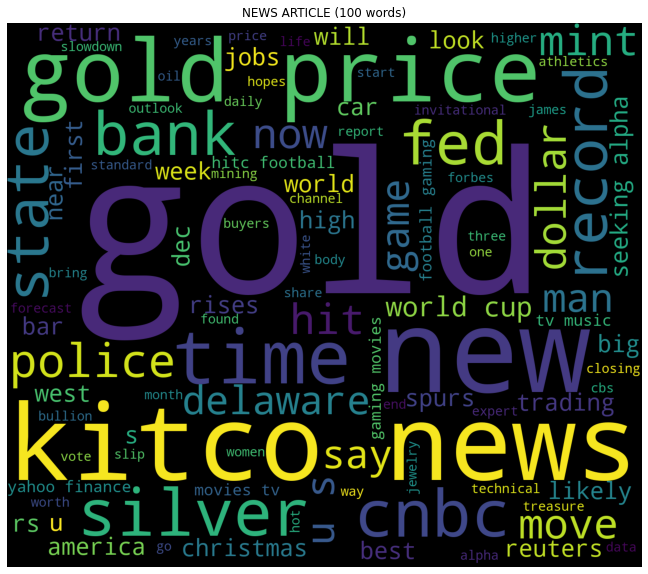

In [ ]:
# Plotting Word Cloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(cloud_words)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

## Part 1: Web Scraping the Articles

In [ ]:
# Getting news articles using get from request packagge

r=requests.get('https://www.kitco.com/news/2022-12-02/Sentiment-shows-gold-price-has-the-momentum-to-move-solidly-above-1-800.html')

In [ ]:
#Setting encoding of the HTML page
r.encoding = 'utf-8'

In [ ]:
# Extracting the HTML from the request object
html = r.text

In [ ]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" itemscope itemtype="http://schema.org/Article"><!-- InstanceBegin template="/Templates/media_article_v2.dwt" codeOutsideHTMLIsLocked="false" -->
	<head> 
								
				
				<title>Sentiment shows gold price has the momentum to move solidly above $1,800 | Kitco News</title>
				<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1">
		
		   <!-- p


In [ ]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

In [ ]:
#total length
len(text)

17245

In [ ]:
#having a look at the text
print(text[100:1100])

















































































Make Kitco Your Homepage




Login


Sign Up

Refresh Page




















Home





Buy/Sell Gold &
							Silver Bullion Coins and Bars
					

Online Store



Buy Gold & Silver


Great Deals


Gift Ideas


Cool and Collectible


Gold


Gold Coins


Gold Bars


Silver


Silver Coins


Silver Rounds


Silver Bars


Platinum


Platinum Coins


Platinum Bars


Palladium


Rhodium


Bullion Mints


Kitco Pool


VaultChain™

GOLD
SILVER



Sell Gold & Silver


Coins and Bars


Rhodium Products


Kitco Pool


Refining and Scrap

VaultChain™ Gold
VaultChain™ Silver

Storage Programs

Kitco AllocatedStorage Program

IRA/RSP
VaultChain™

Refining Services

Jeweler Resources
Reference Tables
Refining
                                                    and Scrap

Institutional and  Wholesale Services


Customer Service

Contact Us
Shipping and Insurance
Payments andCancellations
Business Hours

Retail Store Lo


In [ ]:
# Text Cleaning

clean_text= text.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [ ]:
clean_text

'\n\nSe time t shows gold price has the mome tum to move solidly above $1,800 | Kitco News\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMake Kitco Your Homepage\n\n\n\n\nLogi \n\n\nSig  Up\n\nRefresh Page\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\n\n\n\n\n\nBuy Sell Gold &\r\n\t\t\t\t\t\t\tSilver Bullio  Coi s a d Bars\r\n\t\t\t\t\t\n\nO li e Store\n\n\n\nBuy Gold & Silver\n\n\nGreat Deals\n\n\nGift Ideas\n\n\nCool a d Collectible\n\n\nGold\n\n\nGold Coi s\n\n\nGold Bars\n\n\nSilver\n\n\nSilver Coi s\n\n\nSilver Rou ds\n\n\nSilver Bars\n\n\nPlati um\n\n\nPlati um Coi s\n\n\nPlati um Bars\n\n\nPalladium\n\n\nRhodium\n\n\nBullio  Mi ts\n\n\nKitco Pool\n\n\nVaultChai ™\n\nGOLD\nSILVER\n\n\n\nSell Gold & Silver\n\n\nCoi s a d Bars\n\n\nRhodium Products\n\n\nKitco Pool\n\n\nRefi i g a d Scrap\n\nVaultChai ™ Gold\nVaultChai ™ Silver\n\nStorage Progra

In [ ]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
sentence

['Se time t shows gold price has the mome tum to move solidly above $1,800 | Kitco News\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMake Kitco Your Homepage\n\n\n\n\nLogi \n\n\nSig  Up\n\nRefresh Page\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome',
 'Buy Sell Gold &\r\n\t\t\t\t\t\t\tSilver Bullio  Coi s a d Bars\r\n\t\t\t\t\t\n\nO li',
 'e Store\n\n\n\nBuy Gold & Silver\n\n\nGreat Deals\n\n\nGift Ideas\n\n\nCool a d Collectible\n\n\nGold\n\n\nGold Coi s\n\n\nGold Bars',
 'Silver\n\n\nSilver Coi s\n\n\nSilver Rou ds\n\n\nSilver Bars\n\n\nPlati um\n\n\nPlati um',
 'Coi s\n\n\nPlati um Bars\n\n\nPalladium\n\n\nRhodium\n\n\nBullio  Mi ts\n\n\nKitco Pool\n\n\nVaultChai ™\n\nGOLD\nSILVER\n\n\n\nSell Gold & Silver\n\n\nCoi s a d Bars\n\n\nRhodium Products\n\n\nKitco Pool\n\n\nRefi',
 'i g a d Scrap\n\nVaultChai ™ Gold\nVaultChai ™ Silver\n\nStorage Progr

In [ ]:
# Printing length of sentences

print(len(sentence))

171


In [ ]:
# Looking at the random sentence to verify
print(sentence[2])

e Store



Buy Gold & Silver


Great Deals


Gift Ideas


Cool a d Collectible


Gold


Gold Coi s


Gold Bars


## Part 2: Sentiment Analysis with Textblob

In [ ]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [ ]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [ ]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Se time t shows gold price has the mome tum to...,0.000000,0.100000
1,Buy Sell Gold &\r\n\t\t\t\t\t\t\tSilver Bullio...,0.000000,0.000000
2,e Store\n\n\n\nBuy Gold & Silver\n\n\nGreat De...,0.216667,0.733333
3,Silver\n\n\nSilver Coi s\n\n\nSilver Rou ds\n\...,0.000000,0.000000
4,Coi s\n\n\nPlati um Bars\n\n\nPalladium\n\n\nR...,0.000000,0.000000


In [ ]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      171 non-null    object 
 1   Polarity      171 non-null    float64
 2   Subjectivity  171 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

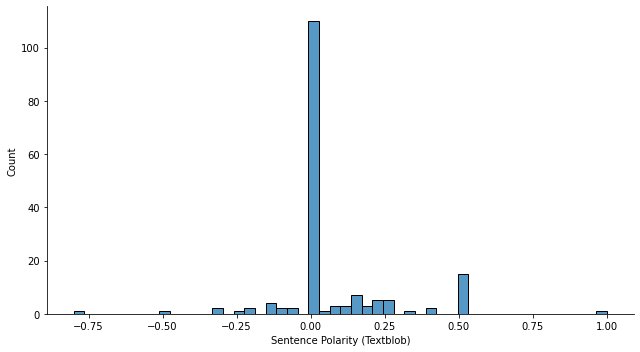

In [ ]:
# Analyzing polarity using visuals

sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Due to some reason around half the sentences have zero polarity. Maybe, its because of the dact they are neutral. A few sentences are highly positive and a few are negative.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

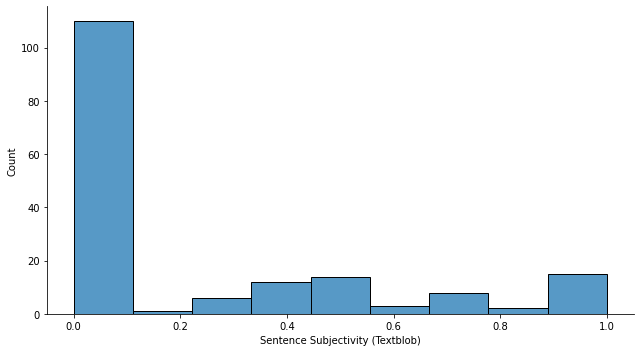

In [ ]:
# Analyzing subjectivity using visuals

sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

The values of subjectivity also very with few sentences being highly subjective and a majority of sentences being less subjective.

## Part 3: Sentiment Analysis with Pattern

In [ ]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [ ]:
pattern_sentiment[1]

['Buy Sell Gold &\r\n\t\t\t\t\t\t\tSilver Bullio  Coi s a d Bars\r\n\t\t\t\t\t\n\nO li',
 0.0,
 0.0]

In [ ]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [ ]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Se time t shows gold price has the mome tum to...,0.000000,0.100000
1,Buy Sell Gold &\r\n\t\t\t\t\t\t\tSilver Bullio...,0.000000,0.000000
2,e Store\n\n\n\nBuy Gold & Silver\n\n\nGreat De...,0.216667,0.733333
3,Silver\n\n\nSilver Coi s\n\n\nSilver Rou ds\n\...,0.000000,0.000000
4,Coi s\n\n\nPlati um Bars\n\n\nPalladium\n\n\nR...,0.000000,0.000000


In [ ]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      171 non-null    object 
 1   Polarity      171 non-null    float64
 2   Subjectivity  171 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

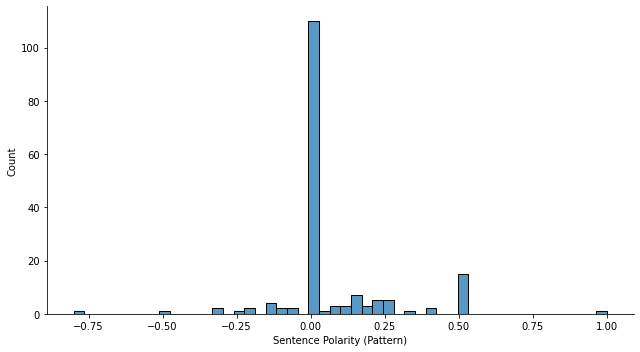

In [ ]:
# Plotting the scores

sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

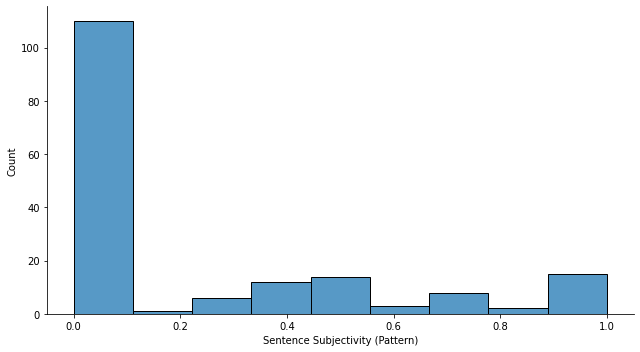

In [ ]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

Similar data distribution can be seen.

## Part 4: Word frequency and Word Cloud

In [ ]:
# Creating the nltk tokenizer and Tokenizing text

tokens = nltk.tokenize.word_tokenize(clean_text)

In [ ]:
len(tokens)

3066

In [ ]:
print(tokens[0:10])

['Se', 'time', 't', 'shows', 'gold', 'price', 'has', 'the', 'mome', 'tum']


In [ ]:
# Converting to lower cases for uniformality

words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
words_new = []
# Appending to words_new all words that are in words but not in stopwords
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [ ]:
len(words_new)

2350

In [ ]:
print(words_new[0:10])

['se', 'time', 'shows', 'gold', 'price', 'mome', 'tum', 'move', 'solidly', '$']


In [ ]:
# The frequency distribution of the words

freq_dist = nltk.FreqDist(words_new)

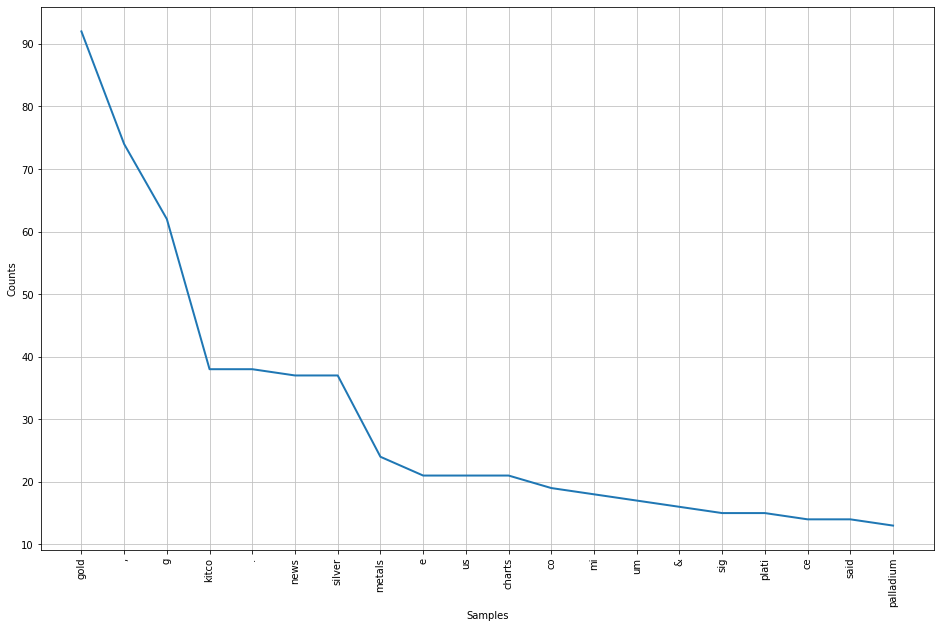

In [ ]:
# Frequency Distribution Plot

plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [ ]:
# Converting into string

res=' '.join([i for i in words_new if not i.isdigit()])

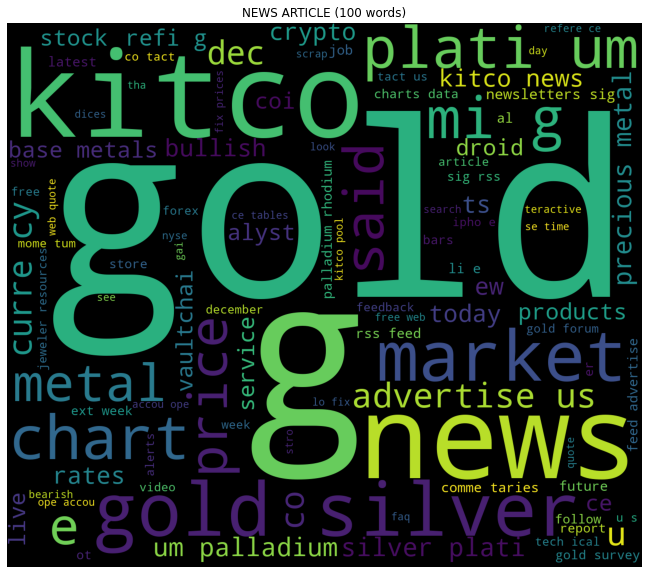

In [ ]:
# Plotting Word Cloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()